In [1]:
from scipy import sparse
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, accuracy_score, confusion_matrix, recall_score, precision_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import itertools
import warnings
import os
import cv2

In [2]:
# path = 'D:\study-hk2\ML\ML\classification_fish\data\Fish_Dataset' 
# path = "D:\\study\\machine_learning\\classification_fish\\data\\Fish_Dataset" # đường dẫn đến thư mục chứa dữ liệu
path = 'D:\\study-hk2\\ML\\ML\\classification_fish\\data\\NA_Fish_Dataset'
classes = [i for i in os.listdir(path) if '.' not in i]                     
classes

['Black Sea Sprat',
 'Gilt Head Bream',
 'Hourse Mackerel',
 'Red Mullet',
 'Red Sea Bream',
 'Sea Bass',
 'Shrimp',
 'Striped Red Mullet',
 'Trout']

In [4]:
data_test = []
folders = os.listdir(path)
for folder in folders:
    folder_path = os.path.join(path, folder)
    num_images = len(os.listdir(folder_path))  # Đếm số lượng ảnh trong thư mục
    for i in range(1, num_images + 1):
        img_path = os.path.join(folder_path, f"{str(i).zfill(5)}.png")

        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (128, 128))
        data_test.append([img, folder])

In [5]:
# tạo image và label từ data_test
images = []
labels = []
for image, label in data_test:
    images.append(image)
    labels.append(label)

In [ ]:
# chuấn hóa label thành dạng số
le = LabelEncoder()
labels = le.fit_transform(labels)

# in ra label và tên tương ứng
for i in range(9):
    print(i, le.classes_[i])

0 Black Sea Sprat
1 Gilt Head Bream
2 Hourse Mackerel
3 Red Mullet
4 Red Sea Bream
5 Sea Bass
6 Shrimp
7 Striped Red Mullet
8 Trout


In [6]:
# chuyển images thành numpy array và chuẩn hóa về khoảng [0, 1]
images = np.array(images)
images = images.astype('float32') / 255.0
images.shape

(430, 128, 128, 3)

In [7]:
# duỗi ảnh thành vector
images = images.reshape(images.shape[0], -1)

d:\package\anaconda3\envs\dyn\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\package\anaconda3\envs\dyn\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\package\anaconda3\envs\dyn\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\package\anaconda3\envs\dyn\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\package\anaconda3\envs\dyn\Lib\si

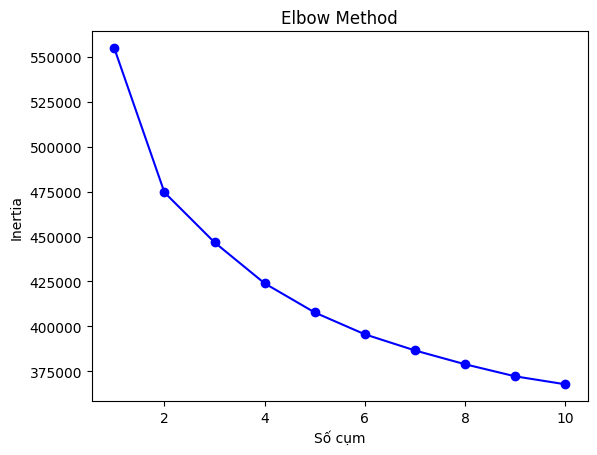

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score



# Chạy thuật toán K-means với số cụm từ 1 đến 10
num_clusters = range(1, 11)
inertia = []

for k in num_clusters:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(images)
    inertia.append(kmeans.inertia_)

# Vẽ biểu đồ Elbow
plt.plot(num_clusters, inertia, 'bo-')
plt.xlabel('Số cụm')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

# # Vẽ biểu đồ Silhouette
# plt.plot(num_clusters[1:], silhouette_scores, 'bo-')
# plt.xlabel('Số cụm')
# plt.ylabel('Silhouette Score')
# plt.title('Silhouette Method')
# plt.show()
